Using TensorFlow backend.


(60000, 28, 28)
(60000, 28, 28)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

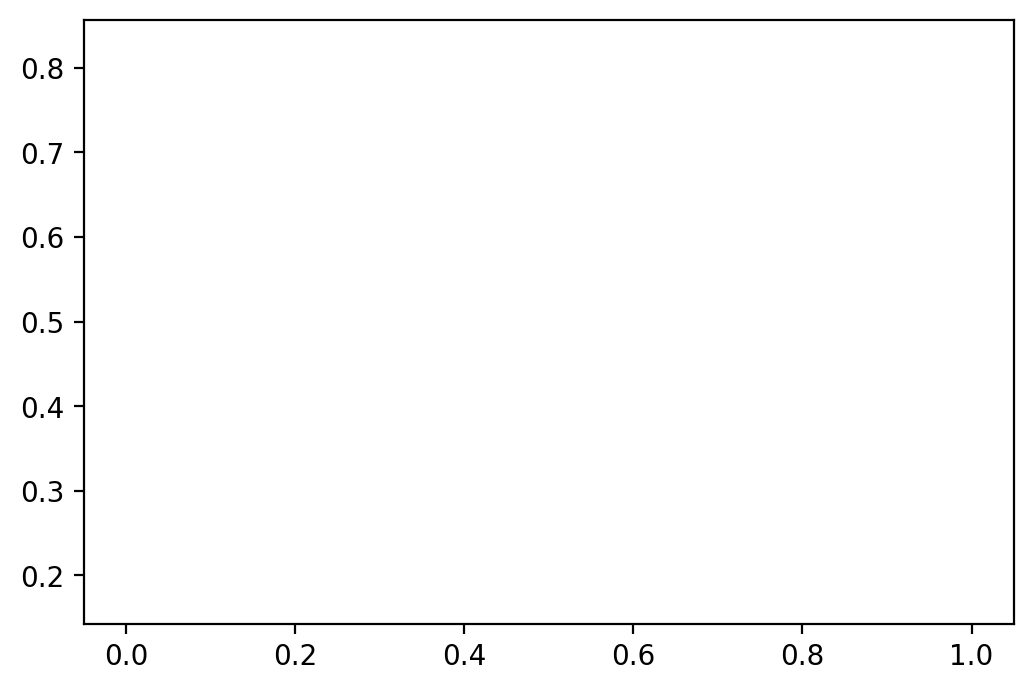

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils
from keras import backend as K

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100
plt.ion()
plt.axis('equal')


def create_conv_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     #kernel_regularizer=keras.regularizers.l1(l=0.00001),
                     input_shape=input_shape
                    ))
    model.add(MaxPooling2D( pool_size=(2, 2) ))
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     #kernel_regularizer=keras.regularizers.l1(l=0.00001)
                    ))
    model.add(MaxPooling2D( pool_size=(2, 2) ))
    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(128,
                    activation='relu',
                   # kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                   # kernel_regularizer=keras.regularizers.l1(l=0.00001)
                   )
             )
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,
                    activation='softmax',
                    #kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None), 
                   # kernel_regularizer=keras.regularizers.l1(l=0.00001)
                   )
             )
    
    optimizer = Adadelta()
    %time model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3),
#                      activation='relu',
#                      input_shape=input_shape))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation='softmax'))

#     model.compile(loss=keras.losses.categorical_crossentropy,
#                   optimizer=keras.optimizers.Adadelta(),
#                   metrics=['accuracy'])
    
    return model



from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
#x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, train_size=50000, test_size=10000)
print(x_train.shape)
#print(x_validation.shape)

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   # x_validation = x_validation.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   # x_validation = x_validation.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_validation = x_validation.astype('float32')

x_train /= 255
x_test /= 255
#x_validation /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
#print(x_validation.shape, 'validation samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#y_validation = keras.utils.to_categorical(y_validation, num_classes)


model = create_conv_model()

model.summary()

from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor="acc", mode=max)]

h = model.fit(x_train, y_train, batch_size=batch_size, callbacks=my_callbacks, epochs=epochs, verbose=1, 
              validation_data=(x_test, y_test))

#model.save_weights("kera-mnist-conv.model")

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

